In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

In [2]:
import pickle

In [3]:
with open('boards.pkl','rb') as f: boards = pickle.load(f)

In [4]:
import matplotlib.pyplot as plt

In [5]:
#for MOVE in range(boards.shape[0]):
    #plt.figure()
    #plt.imshow(boards[MOVE])

In [6]:
from copy import deepcopy

In [7]:
moves = []
pred = []
for MOVE in range(boards.shape[0] - 1):
    moves.append(boards[MOVE].reshape(6*7))
    pred.append(deepcopy(boards[MOVE+1].reshape(6*7)))

In [8]:
#Normalize pred
for MOVE in range(boards.shape[0] - 1):
    pred[MOVE] -= deepcopy(moves[MOVE])
    if pred[MOVE].sum() > 1:
        pred[MOVE] /= 2

In [9]:
moves = np.array(moves)
pred = np.array(pred)

In [10]:
#Remove transitions between games
index = np.abs(pred.sum(1)) == 1
moves = moves[index]
pred = pred[index]

In [13]:
model = Sequential()
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=8)
model.add(keras.Input(shape=(42)))
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(42, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 200)               8600      
                                                                 
 dropout (Dropout)           (None, 200)               0         
                                                                 
 dense_1 (Dense)             (None, 42)                8442      
                                                                 
Total params: 17,042
Trainable params: 17,042
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.fit(moves,pred, batch_size=128,
          epochs=200,  callbacks=[callback], validation_split=0.1)

Epoch 1/200
7/7 [==============================] - 1s 39ms/step - loss: 3.8614 - accuracy: 0.0201 - val_loss: 3.8181 - val_accuracy: 0.0000e+00
Epoch 2/200
7/7 [==============================] - 0s 9ms/step - loss: 3.7178 - accuracy: 0.0485 - val_loss: 3.7266 - val_accuracy: 0.0319
Epoch 3/200
7/7 [==============================] - 0s 8ms/step - loss: 3.6347 - accuracy: 0.0615 - val_loss: 3.6613 - val_accuracy: 0.0745
Epoch 4/200
7/7 [==============================] - 0s 12ms/step - loss: 3.5367 - accuracy: 0.0994 - val_loss: 3.5955 - val_accuracy: 0.0638
Epoch 5/200
7/7 [==============================] - 0s 14ms/step - loss: 3.4699 - accuracy: 0.1041 - val_loss: 3.5239 - val_accuracy: 0.1170
Epoch 6/200
7/7 [==============================] - 0s 6ms/step - loss: 3.3992 - accuracy: 0.1124 - val_loss: 3.4606 - val_accuracy: 0.1383
Epoch 7/200
7/7 [==============================] - 0s 17ms/step - loss: 3.3317 - accuracy: 0.1680 - val_loss: 3.4048 - val_accuracy: 0.1596
Epoch 8/200
7/7 [==

7/7 [==============================] - 0s 5ms/step - loss: 1.5879 - accuracy: 0.5195 - val_loss: 2.0669 - val_accuracy: 0.3511
Epoch 60/200
7/7 [==============================] - 0s 8ms/step - loss: 1.5400 - accuracy: 0.5491 - val_loss: 2.0548 - val_accuracy: 0.3511
Epoch 61/200
7/7 [==============================] - 0s 12ms/step - loss: 1.5413 - accuracy: 0.5396 - val_loss: 2.0551 - val_accuracy: 0.3298
Epoch 62/200
7/7 [==============================] - 0s 12ms/step - loss: 1.5304 - accuracy: 0.5302 - val_loss: 2.0575 - val_accuracy: 0.3511
Epoch 63/200
7/7 [==============================] - 0s 12ms/step - loss: 1.4972 - accuracy: 0.5290 - val_loss: 2.0743 - val_accuracy: 0.3404
Epoch 64/200
7/7 [==============================] - 0s 13ms/step - loss: 1.5113 - accuracy: 0.5586 - val_loss: 2.0700 - val_accuracy: 0.2979
Epoch 65/200
7/7 [==============================] - 0s 10ms/step - loss: 1.5267 - accuracy: 0.5337 - val_loss: 2.0591 - val_accuracy: 0.3298
Epoch 66/200
7/7 [==========

7/7 [==============================] - 0s 9ms/step - loss: 1.1171 - accuracy: 0.6627 - val_loss: 2.0421 - val_accuracy: 0.4043
Epoch 118/200
7/7 [==============================] - 0s 8ms/step - loss: 1.0941 - accuracy: 0.6627 - val_loss: 2.0374 - val_accuracy: 0.4043
Epoch 119/200
7/7 [==============================] - 0s 17ms/step - loss: 1.1150 - accuracy: 0.6509 - val_loss: 2.0728 - val_accuracy: 0.3936
Epoch 120/200
7/7 [==============================] - 0s 8ms/step - loss: 1.1232 - accuracy: 0.6473 - val_loss: 2.0654 - val_accuracy: 0.4149
Epoch 121/200
7/7 [==============================] - 0s 9ms/step - loss: 1.1315 - accuracy: 0.6379 - val_loss: 2.0611 - val_accuracy: 0.4149
Epoch 122/200
7/7 [==============================] - 0s 14ms/step - loss: 1.0976 - accuracy: 0.6592 - val_loss: 2.0371 - val_accuracy: 0.4043
Epoch 123/200
7/7 [==============================] - 0s 10ms/step - loss: 1.0993 - accuracy: 0.6592 - val_loss: 2.0347 - val_accuracy: 0.4043
Epoch 124/200
7/7 [=====

In [28]:
#Board to give model to predict next move
new_board = [
[0., 0., 0., 0., 0., 0., 0.],
[0., 0., 0., 0., 0., 0., 0.],
[0., 0., 0., 0., 0., 0., 0.],
[0., 0., 0., 0., 0., 0., 0.],
[0., 0., 0., 0., 0., 0., 0.],
[0., 0., 2., 1., 1., 0., 0.]]

In [29]:
#Reshaped input board for model
shaped_board = np.array(new_board).reshape(1, 42)

1/1 [==============================] - 0s 16ms/step


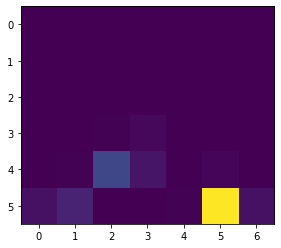

In [30]:
#Predict the next move and output heat map
predicted = model.predict(shaped_board)
plt.imshow(predicted.reshape(6,7))

In [19]:
out = deepcopy(predicted)

In [20]:
#Decide on highest probability move
value = out.argmax(axis=1)
while shaped_board[0][value] == 1:
    out[0][value] = 0
    value = out.argmax(axis=1)
value[0]

17

In [21]:
#Output next move 
space = 0
while space < 42:
    if space == value:
        out[0][space] = 1
    else:
        out[0][space] = 0
    space = space + 1
out.reshape(6,7)

array([[0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.]], dtype=float32)